앞에서 살펴본 식은 조건 분기에 따라서 0 또는 1을 출력한다. 이와 같은 함수를 계한 함수 (step function)이라고 한다. "퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다."라고 표현할 수 있는 것이다. 즉, 활성화 함수로 쓸 수 있는 여러 함수들 중에서, 퍼셉트론은 계단 함수를 이용하고 있는 것이다. 그럼 계단함수 이외의 활성화 함수에는 어떤 것들이 있을까?

# 3.2.1 시그모이드 함수

다음은 신경망에서 자주 이용하는 함수인 시그모이드 함수를 나타낸 식이다. 

<p align="center"><img src="imgs/sig.jpg" width=700></p>
ref: http://taewan.kim/post/sigmoid_diff/

위 식에서 exp(-x)는 자연상수가 사용되었다. 이는 2.7182...의 값을 갖는 실수이다. 시그모이드 함수를 얼핏보면 복잡해 보이지만 이 역시 단순한 함수일 뿐이다. 함수는 입력을 주면 출력을 돌려주는 변환기이다. 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다. 사실 앞 장에서 본 퍼셉트론과 앞으로볼 신경망의 주된 차이는 이 활성화 함수 뿐이라고 한다. 

* 퍼셉트론과 신경망의 차이? -> 활성화 함수가 계단함수냐 시그모이드냐 차이

# 3.2.2 계단 함수 구현하기

계단 함수를 코드로 구현해보면 아래와 같다.

In [2]:
import numpy as np

def step_funcion(x):
    if x > 0:
        return 1
    else:
        return 0


이 구현은 단순하고 쉽지만, 입력값 x는 부동소수점만 받아들인다.

** 부동소수점
부동소수점은 고정소수점과 대비되는 개념으로, 소수점의 위치를 고정하지 않고 유동적으로 운영한다는 의미이다. 부동소수점을 영어로 표현하면 floating point라고 하는데, 그래서 실수형을 파이썬에서 float이라고 많이 부른다. 부동소수점이 동작하는 방식은 IEEE의 표준을 따른다고 하는데, 구글링해보면 자세한 설명이 나와있다. 포인트는 실수의 정확한 값이 아닌, 근사값이 할당된다는 것이다. 파이선도 역시 float 형태가 사용되는데, 아래 예시를 보면 이해가 된다. 상식적으로 0.01을 100번 더하면 1이 되어야 하지만, 더하다 보면 조금 값이 남는 것을 알 수 있다. 부동소수점은 더하기 연산에서 조심하면 될 듯하다. 곱하기 연산에서는 1이라고 정상 출력되는 것을 확인할 수 있었다.

In [4]:
sum = 0
for i in range(100):
    sum += 0.01

print(sum)
print(0.01 * 100)

1.0000000000000007
1.0


다시 책으로 돌아가서 이제 계단 함수의 입력값을 float 형태뿐만 아니라, 넘파이 배열도 받아들일 수 있도록 바꿔보자. 파이썬의 간단한 트릭을 이용하면 쉽게 구할 수 있다.

In [5]:
def step_funcion(x):
    y = x > 0
    return y.astype(np.int)

In [9]:
x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x > 0
print(y)

y = y.astype(np.int)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


C:\Users\white\AppData\Local\Temp\ipykernel_24856\3390995843.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


# 3.2.3 계단 함수의 그래프

계단함수의 그래프를 matplotlib을 이용하여 그려보자.

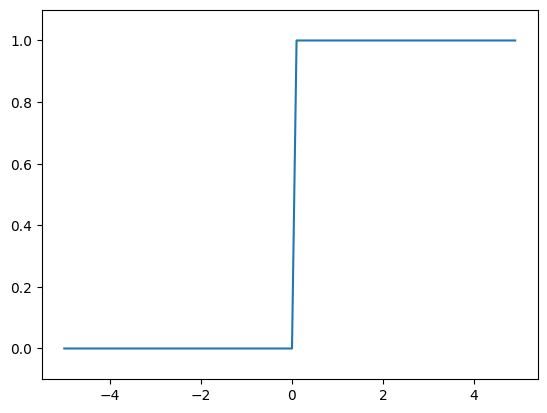

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def step_funcion(x):
    return np.array(x > 0, dtype=int) # np.int 대신 그냥 int라고 하기!(권장)

x = np.arange(-5.0, 5.0, 0.1)   # x값의 범위 설정
y = step_funcion(x)             # 계단 함수 통과
plt.plot(x, y)                  # 플롯 그리기
plt.ylim(-0.1, 1.1)             # ylim으로 y값 범위 정해주기
plt.show()                      # 출력

# 3.2.4 시그모이드 함수 구현하기

이어서 시그모이드 함수를 구현해본다.

In [14]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

위 함수가 넘파이 배열도 잘 처리해줄 수 있는 이유는 브로드캐스팅 기능 때문이다. 브로드캐스팅 기능이란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라 연산으로 바꿔 수행하는 것이다. 즉, 쉽게 말하면 shape가 작은 놈을 알아서 확장해주고 연산을 수행한다는 말이다. 좋은 블로그가 있으니 참고하면 좋다. 쉬운 예제를 하나 살펴보면 아래와 같다.<br><br>

refence: https://chan-lab.tistory.com/12

In [15]:
t = np.array([1.0, 2.0, 3.0])

1 + t

array([2., 3., 4.])

이제 시그모이드 함수를 그래프로 구현해 보자.

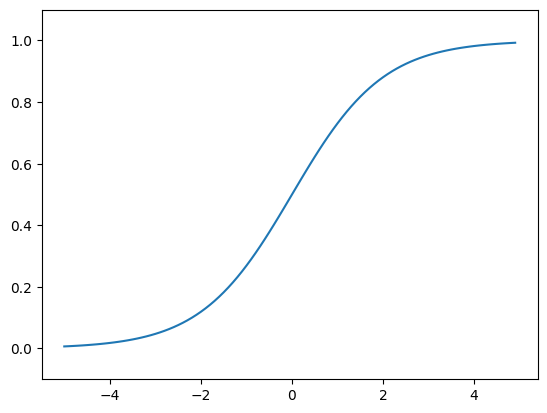

In [16]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# 3.2.5 시그모이드 함수 vs 계단 함수

* 매끄러움의 정도에 차이가 있다. 시그모이드 함수가 더 매끄럽다.
* 계단함수는 0, 1만 돌려주지만, 시그모이드 함수는 그 사이값도 돌려줄 수 있다.

공통점이라고 한다면? -> 둘다 0에 가까우면 0을 출력하고 1에 가까우면 1을 출력한다는 것

<br><br><br>

# 3.2.6 비선형 함수

계단함수와 시그모이드 함수의 공통점은 비선형 함수라는 것이다. 직선 1개로는 그릴 수 없는 함수를 비선형 함수라고 한다. 신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 그 이유는, 선형함수를 사용하면 신경망을 깊게 하는 의미가 없어지기 때문이다. 즉, 선형함수를 여러번 해도 1번만 사용한 것과 같기 때문에 굳이 신경망을 쌓는 이유가 없어진다. 그래서 신경망의 활성화 함수는 비선형함수를 쓰는 것이 의미가 있다. (책 75p 참조)

<br><br><br>

# 3.2.7 ReLU함수

렐루 함수의 그래프는 아래와 같이 구현할 수 있다. 렐루 함수는 0보다 작은 값은 0을 출력하고, 0보다 큰 값은 자기 자신을 출력하는 함수이다. 활성화 함수로 자주 등장하는 녀석이니 꼭 알아두도록 하자.

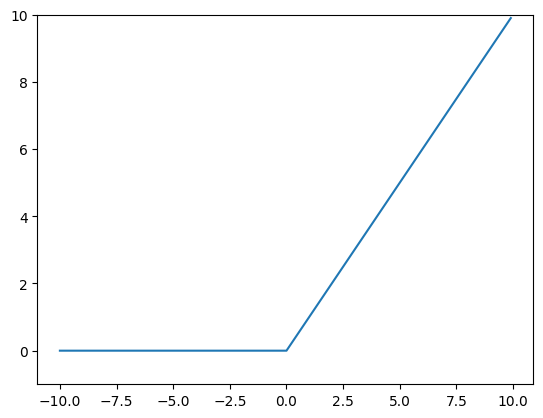

In [25]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 10)
plt.show()